# 🧠 Handwritten digit recognition using simple Artifical Neutral Network (ANN) / MLP (Multilayer Perceptron) with MNIST dataset
This notebook demonstrates how to train a simple MLP model on the MNIST dataset using TensorFlow/Keras.

In [1]:
# 📦 Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model

In [2]:
# 📥 Step 1: Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(f"Training data shape: {x_train.shape}, Training labels shape: {y_train.shape}")
print(f"Test data shape: {x_test.shape}, Test labels shape: {y_test.shape}")

Training data shape: (60000, 28, 28), Training labels shape: (60000,)
Test data shape: (10000, 28, 28), Test labels shape: (10000,)


In [3]:
# 🧹 Step 2: Preprocess the data
# Normalize pixel values to [0, 1]
x_train = x_train / 255.0
x_test = x_test / 255.0

# Convert labels to one-hot encoded vectors
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [4]:
# 🧠 Step 3: Define the MLP model architecture
model = Sequential([
    Flatten(input_shape=(28, 28)),      # Flatten 28x28 images to 784 vector
    Dense(128, activation='relu'),      # Hidden layer with 128 neurons
    Dense(64, activation='relu'),       # Hidden layer with 64 neurons
    Dense(10, activation='softmax')     # Output layer for 10 classes
])
model.summary()

C:\Users\dmohandass\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
# ⚙️ Step 4: Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
# 🚀 Step 5: Train the model
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8761 - loss: 0.4211 - val_accuracy: 0.9640 - val_loss: 0.1178
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9670 - loss: 0.1079 - val_accuracy: 0.9671 - val_loss: 0.1033
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9764 - loss: 0.0728 - val_accuracy: 0.9695 - val_loss: 0.0958
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9832 - loss: 0.0535 - val_accuracy: 0.9758 - val_loss: 0.0858
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9878 - loss: 0.0394 - val_accuracy: 0.9738 - val_loss: 0.0832
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9883 - loss: 0.0356 - val_accuracy: 0.9764 - val_loss: 0.0889
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9903 - loss: 0.0280 - val_accuracy: 0.9655 - val_loss: 0.1312
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9923 - loss: 0.0225

In [7]:
# 📊 Step 6: Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"✅ Test Accuracy: {test_accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9726 - loss: 0.1112
✅ Test Accuracy: 0.9765


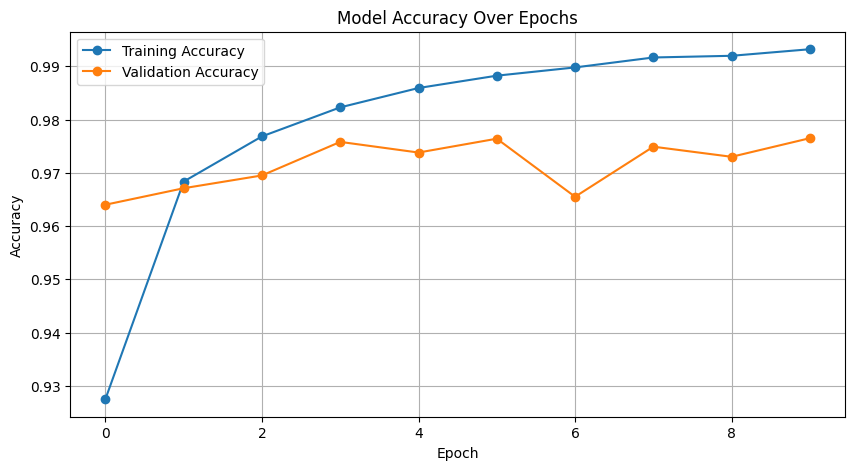

In [8]:
# 📈 Step 7: Visualize training history
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [9]:
# 💾 Step 8: Save the model to a file
# This saves the entire model (architecture + weights + optimizer state) in HDF5 format.
model.save("handwritten-digit-recognition-model-v1.h5")

In [10]:
# 📂 step 9: Load the model from file
model_v1 = load_model("handwritten-digit-recognition-model-v1.h5")

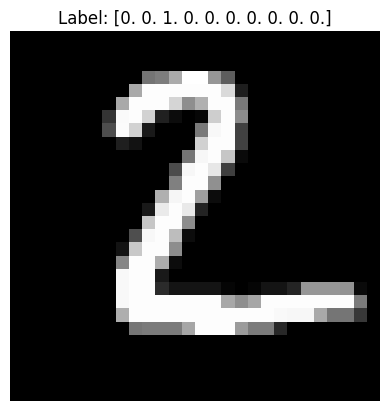

In [17]:
# 🧪 step 10: Load a new input image

# Select and plot the second test image
image = x_test[1]
label = y_test[1]

plt.imshow(image, cmap='gray')
plt.title(f"Label: {label}")
plt.axis('off')
plt.show()

In [18]:
# 🧪 step 11: Predict now
# model expects a batch of images
image = image.reshape(1, 28, 28) # reshape as per the model input

predictions = model_v1.predict(image)

# Print the full prediction scores
#print("Complete Prediction scores:", predictions[0])

# Get the most confident class
predicted_class = np.argmax(predictions)
confidence = predictions[0][predicted_class]

print(f"Predicted digit: {predicted_class} with confidence: {confidence:.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
Predicted digit: 2 with confidence: 1.0000
